#  **LDA**

Get the data from the csv file

In [77]:
import pandas as pd
import numpy as np
import re

In [113]:
df = pd.read_csv('preprocessed_data_craigslist.csv')
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df.head()

,price,location,url,date,title,numimage,text,condition,makemanufacturer,modelnamenumber,...,electricassist,framesize,handlebartype,suspension,wheelsize,sizedimensions,serialnumber,paintcolor,yearmanufactured,days
0,1000.0,auburn,https://auburn.craigslist.org/mcd/d/fayettevil...,2022-04-05 15:32,"BAD CREDIT, NO CREDIT, OK! WE WORK WITH EVERYONE!",10.0,"WE SHIP NATIONWIDE, FINANCE NATIONWIDE! YOU SE...",unknown,0.0,0.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,21
1,2995.0,auburn,https://auburn.craigslist.org/fod/d/fairburn-2...,2022-04-16 14:51,2017 Club Car Precedent 4 Seater Gas Alabama C...,20.0,Very Nice 2017 Club Car Precedent EFI Gas Alab...,4,0.0,0.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,10
2,30.0,auburn,https://auburn.craigslist.org/bop/d/opelika-th...,2022-04-16 09:07,Thule 961XT Speedway Bike Strap Rear Rack Carrier,6.0,Thule 961XT Speedway - Bike Strap Rear Rack Ca...,4,1.0,1.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,10
3,112.0,auburn,https://auburn.craigslist.org/sgd/d/full-garag...,2022-04-15 12:52,"Full Garage Gym-Squat Rack, Dumbbells- Financi...",4.0,"Full Garage Gym Setup- Squat Rack, Adjustable ...",4,1.0,1.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,11
4,167.0,auburn,https://auburn.craigslist.org/sgd/d/home-gym-s...,2022-03-26 14:27,"Home Gym Setup-Squat Rack,Functional Trainer,B...",7.0,"Home Gym Setup- Squat Rack,Functional Trainer,...",4,1.0,0.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,31


## **Text mining**


In [80]:
import nltk

In [81]:
! conda list| grep gensim

gensim                    4.1.2                    pypi_0    pypi


In [82]:
!pip freeze 
!python -V

appnope==0.1.0
attrs==19.3.0
backcall==0.1.0
beautifulsoup4==4.10.0
bleach==3.1.3
branca==0.4.2
bs4==0.0.1
certifi==2019.11.28
cffi==1.15.0
charset-normalizer==2.0.12
click==8.1.0
cloudscraper==1.2.58
cryptography==36.0.1
cycler==0.11.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
et-xmlfile==1.1.0
fenics-dijitso==2019.1.0
fenics-dolfin==2019.1.0
fenics-ffc==2019.1.0
fenics-fiat==2019.1.0
fenics-ufl==2019.1.0
folium==0.12.1.post1
fonttools==4.29.1
funcy==1.17
future==0.18.2
gensim==4.1.2
geojsonio==0.0.3
github3.py==3.2.0
gmplot==1.4.1
idna==3.3
importlib-metadata==1.5.0
ipykernel==5.1.4
ipython==7.13.0
ipython-genutils==0.2.0
jedi==0.16.0
Jinja2==2.11.1
joblib==1.1.0
jsonschema==3.2.0
jupyter-client==6.1.0
jupyter-contrib-core==0.3.3
jupyter-contrib-nbextensions==0.5.1
jupyter-core==4.6.3
jupyter-highlight-selected-word==0.2.0
jupyter-latex-envs==1.4.4
jupyter-nbextensions-configurator==0.4.1
kiwisolver==1.3.2
lxml==4.8.0
MarkupSafe==1.1.1
matplotlib==3.5.1
mistune==0.8.4
mpi4p

In [83]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [84]:
!pip install gensim
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maximelevesque/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
#We will use the description and the title of the annouce to get the topic

df_info = df[['text','title']]
df_info

,text,title
0,"WE SHIP NATIONWIDE, FINANCE NATIONWIDE! YOU SE...","BAD CREDIT, NO CREDIT, OK! WE WORK WITH EVERYONE!"
1,Very Nice 2017 Club Car Precedent EFI Gas Alab...,2017 Club Car Precedent 4 Seater Gas Alabama C...
2,Thule 961XT Speedway - Bike Strap Rear Rack Ca...,Thule 961XT Speedway Bike Strap Rear Rack Carrier
3,"Full Garage Gym Setup- Squat Rack, Adjustable ...","Full Garage Gym-Squat Rack, Dumbbells- Financi..."
4,"Home Gym Setup- Squat Rack,Functional Trainer,...","Home Gym Setup-Squat Rack,Functional Trainer,B..."
...,...,...
3306,I have like 6 bikes that have to go today Mar...,Bikes that must go.. take what ever
3307,Different condition bikes that need to go.. le...,I got three bikes that have to go asap!!!
3308,"Land Rover for 2"" receiver, carries 4 bikes or...",Bike Carrier 4 bikes
3309,Save space with this heavy duty bike rack for ...,Gravity rack for two bikes


In [86]:
bike_desc_list = list()
for i in df_text.index:
    bike_desc_list.append(df_info['title'][i]+df_info['text'][i])

In [87]:
for i in range(len(bike_desc_list)):
    desc = bike_desc_list[i]
    sents = sent_tokenize(desc)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    bike_desc_list[i] = '. '.join(sents)

In [88]:
texts = [[word for word in desc.lower().split()
        if word not in STOPWORDS and word.isalpha() and not word.lower() == 'slate'] #We only keep alpha values
        for desc in bike_desc_list]

In [89]:
dictionary = corpora.Dictionary(texts) #(word_id,word) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence

In [90]:
for item in dictionary.iteritems():
    print(item)

(0, 'almost')
(1, 'apply')
(2, 'available')
(3, 'bad')
(4, 'better')
(5, 'bikes')
(6, 'brothers')
(7, 'browse')
(8, 'buying')
(9, 'call')
(10, 'cbr')
(11, 'check')
(12, 'choose')
(13, 'clean')
(14, 'come')
(15, 'credit')
(16, 'cruiser')
(17, 'customers')
(18, 'cycle')
(19, 'days')
(20, 'everyone')
(21, 'everything')
(22, 'experienced')
(23, 'finance')
(24, 'financing')
(25, 'find')
(26, 'first')
(27, 'flip')
(28, 'give')
(29, 'great')
(30, 'gsxr')
(31, 'harley')
(32, 'help')
(33, 'high')
(34, 'honda')
(35, 'keep')
(36, 'large')
(37, 'lenders')
(38, 'line')
(39, 'located')
(40, 'looking')
(41, 'low')
(42, 'make')
(43, 'many')
(44, 'matter')
(45, 'minimal')
(46, 'motorcycle')
(47, 'motorcycles')
(48, 'nc')
(49, 'offer')
(50, 'online')
(51, 'operated')
(52, 'options')
(53, 'owned')
(54, 'past')
(55, 'place')
(56, 'price')
(57, 'prices')
(58, 'ranging')
(59, 'rebuild')
(60, 'regardless')
(61, 'repos')
(62, 'ride')
(63, 'riders')
(64, 'right')
(65, 'road')
(66, 'see')
(67, 'selling')
(68, '

In [91]:
#Set parameters
num_topics = 3 #The number of topics that should be generated
passes = 10

In [92]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

In [93]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

[   (   0,
        '0.014*"bike" + 0.011*"inch" + 0.009*"frame" + 0.008*"rear" + '
        '0.007*"road" + 0.007*"front" + 0.006*"x" + 0.005*"brakes"'),
    (   1,
        '0.023*"bike" + 0.023*"bikes" + 0.015*"new" + 0.007*"used" + '
        '0.007*"equipment" + 0.006*"will" + 0.006*"call" + 0.005*"rack"'),
    (   2,
        '0.080*"trailers" + 0.051*"motorcycle" + 0.032*"camping" + 0.031*"car" '
        '+ 0.026*"trailer" + 0.019*"dolly" + 0.018*"atv" + 0.018*"sale"')]


In [94]:
lda.show_topic(2)

[('trailers', 0.080476105),
 ('motorcycle', 0.050675556),
 ('camping', 0.032256197),
 ('car', 0.031150924),
 ('trailer', 0.026439052),
 ('dolly', 0.019440237),
 ('atv', 0.018391402),
 ('sale', 0.018234817),
 ('used', 0.0145037165),
 ('cargo', 0.009753079)]

In [95]:
lda_corpus = lda[corpus]

In [96]:
from itertools import chain

In [97]:
# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print(threshold)
index_cluster1=[]
index_cluster2=[]
index_cluster3=[]
counter = -1
for i,j in zip(lda_corpus,bike_desc_list):
    counter+=1
    for size in range(len(i)):
        if i[size][1] > threshold:
            if i[size][0] == 0:
                index_cluster1.append(counter)
            elif i[size][0] == 1:
                index_cluster2.append(counter)
            elif i[size][0] == 2:
                index_cluster3.append(counter)

0.4015269334002996


In [99]:
print(index_cluster1,'\n', len(index_cluster1))

[15, 16, 27, 43, 53, 54, 57, 59, 71, 78, 93, 94, 96, 98, 99, 100, 102, 105, 106, 108, 109, 112, 136, 150, 154, 156, 165, 195, 196, 207, 214, 224, 227, 235, 237, 238, 248, 249, 258, 259, 277, 284, 286, 288, 322, 335, 339, 340, 342, 343, 349, 353, 361, 370, 384, 387, 388, 392, 395, 396, 401, 402, 410, 412, 421, 425, 458, 459, 464, 465, 466, 470, 474, 512, 515, 516, 518, 519, 520, 521, 530, 531, 532, 533, 537, 539, 543, 549, 552, 553, 554, 555, 567, 570, 572, 578, 579, 589, 591, 592, 605, 608, 609, 611, 612, 613, 614, 623, 624, 625, 626, 630, 632, 636, 642, 645, 646, 647, 648, 660, 663, 665, 671, 672, 692, 695, 696, 698, 699, 700, 701, 710, 711, 712, 713, 716, 717, 718, 719, 722, 723, 727, 731, 733, 734, 748, 750, 758, 761, 762, 765, 767, 768, 769, 770, 777, 779, 782, 783, 792, 795, 798, 803, 804, 805, 806, 807, 808, 809, 813, 815, 816, 821, 822, 823, 824, 825, 826, 827, 828, 834, 839, 842, 843, 845, 846, 854, 869, 871, 874, 875, 881, 885, 894, 897, 906, 910, 913, 914, 916, 923, 928, 940,

In [100]:
print(index_cluster2,'\n', len(index_cluster2))

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 32, 33, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 96, 97, 101, 103, 104, 106, 107, 110, 111, 113, 115, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152, 153, 155, 157, 158, 159, 160, 161, 162, 163, 164, 166, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 197, 198, 199, 200, 202, 204, 205, 206, 208, 209, 210, 211, 212, 213, 215, 216, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 232, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 250, 251, 252, 253, 255, 256, 257, 260, 261, 264, 265, 266, 268, 269, 270, 271, 273, 274, 276, 278, 279, 280, 28

In [101]:
print(index_cluster3,'\n', len(index_cluster3))

[1, 22, 29, 30, 31, 34, 35, 39, 70, 89, 95, 104, 114, 116, 119, 140, 149, 167, 168, 169, 177, 180, 183, 201, 203, 217, 225, 231, 233, 234, 236, 254, 262, 263, 267, 272, 275, 296, 297, 316, 317, 318, 320, 321, 323, 324, 327, 328, 330, 334, 337, 357, 358, 372, 381, 389, 393, 403, 404, 416, 447, 448, 455, 456, 457, 472, 473, 479, 545, 563, 584, 638, 656, 676, 725, 741, 786, 799, 817, 819, 838, 844, 877, 890, 891, 892, 917, 922, 924, 978, 1032, 1033, 1035, 1051, 1076, 1082, 1083, 1091, 1095, 1174, 1184, 1185, 1196, 1205, 1279, 1304, 1317, 1319, 1325, 1332, 1363, 1364, 1374, 1375, 1414, 1415, 1455, 1462, 1507, 1517, 1526, 1604, 1611, 1613, 1621, 1624, 1629, 1630, 1632, 1636, 1642, 1643, 1680, 1682, 1701, 1704, 1707, 1715, 1733, 1740, 1741, 1745, 1775, 1776, 1800, 1883, 1912, 1919, 1931, 2050, 2083, 2125, 2126, 2197, 2205, 2206, 2210, 2213, 2217, 2305, 2357, 2435, 2483, 2492, 2498, 2517, 2527, 2546, 2573, 2590, 2597, 2631, 2640, 2761, 2782, 2783, 2836, 2838, 2879, 2903, 2905, 2907, 2908, 290

In [102]:
#We create word clouds to know which cluster corresponds to which topics

def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)
        
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

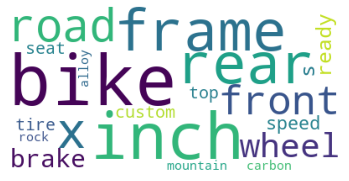

In [103]:
#For the first topic

draw_wordcloud(lda,0)

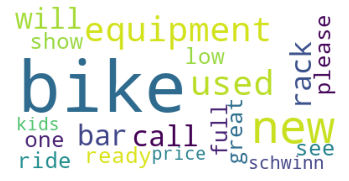

In [104]:
#For the second topic

draw_wordcloud(lda,1)

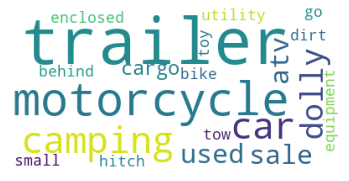

In [105]:
#For the third topic

draw_wordcloud(lda,2) #We can see there is not the world bike 
#in this topic we can delete all the items corresponding to this topics

In [107]:
# We delete the annouces which do not correspond to bike annouces for sure

for i in index_cluster3:
    df.drop(index=i, inplace = True)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace= True)
df.head()

,price,location,url,date,title,numimage,text,condition,makemanufacturer,modelnamenumber,...,electricassist,framesize,handlebartype,suspension,wheelsize,sizedimensions,serialnumber,paintcolor,yearmanufactured,days
0,30.0,auburn,https://auburn.craigslist.org/bop/d/opelika-th...,2022-04-16 09:07,Thule 961XT Speedway Bike Strap Rear Rack Carrier,6.0,Thule 961XT Speedway - Bike Strap Rear Rack Ca...,4,1.0,1.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,10
1,112.0,auburn,https://auburn.craigslist.org/sgd/d/full-garag...,2022-04-15 12:52,"Full Garage Gym-Squat Rack, Dumbbells- Financi...",4.0,"Full Garage Gym Setup- Squat Rack, Adjustable ...",4,1.0,1.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,11
2,75.0,auburn,https://auburn.craigslist.org/bik/d/auburn-gia...,2022-03-16 17:43,"Giant Revel (BLK, GRY) [Poor condition]",0.0,"Giant Revel Mountain bike left outside, chain ...",1,0.0,0.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,40
3,500.0,auburn,https://bham.craigslist.org/snw/d/talladega-co...,2022-04-18 13:02,2 Coleman mini bikes BT200X,0.0,I have 2 Coleman mini bikes that have been sit...,unknown,0.0,0.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,8
4,42.0,auburn,https://bham.craigslist.org/bik/d/springville-...,2022-04-18 09:36,Mountain bikes / children bikes,18.0,I have a Vertical PK7 21 speed mountain bike w...,unknown,0.0,0.0,...,0.0,3,unknown,0.0,unknown,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,75.0,seattle,https://seattle.craigslist.org/oly/bik/d/olymp...,2022-03-28 06:39,Bikes that must go.. take what ever,2.0,I have like 6 bikes that have to go today Mar...,unknown,1.0,1.0,...,0.0,3,unknown,0.0,26,0,0,0,0,29
3092,100.0,seattle,https://seattle.craigslist.org/oly/bik/d/olymp...,2022-03-28 06:40,I got three bikes that have to go asap!!!,2.0,Different condition bikes that need to go.. le...,2,1.0,1.0,...,0.0,3,unknown,0.0,24,0,1,0,0,29
3093,110.0,seattle,https://seattle.craigslist.org/kit/bop/d/breme...,2022-03-27 13:55,Bike Carrier 4 bikes,10.0,"Land Rover for 2"" receiver, carries 4 bikes or...",3,1.0,0.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,30
3094,50.0,seattle,https://seattle.craigslist.org/skc/bop/d/kent-...,2022-03-27 07:57,Gravity rack for two bikes,3.0,Save space with this heavy duty bike rack for ...,4,0.0,0.0,...,0.0,unknown,unknown,0.0,unknown,0,0,0,0,30


In [111]:
#We create the new csv file

df.to_csv('preprocessed_data_craigslist_after_LDA.csv')